# 1

In [ ]:
import os

# Exploration du dataset
train_dir = '/kaggle/input/emotion-detection-fer/train'

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        files = os.listdir(class_path)
        print(f"{class_name}: {len(files)} fichiers")
        if files:
            print(f"   Exemple: {files[0]}")

In [ ]:
# === IMPORTS ===
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score

In [77]:

train_dir = '/kaggle/input/emotion-detection-fer/train'
test_dir = '//kaggle/input/emotion-detection-fer/test'


img_height = 32
img_width = 32
batch_size = 32


train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)


test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False 
)

print("Datasets loaded successfully.")
print("Class names inferred from directory structure:", train_ds.class_names)


Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.
Datasets loaded successfully.
Class names inferred from directory structure: ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [78]:

def get_images_and_labels_for_plotting(dataset, num_samples=25):
    images = []
    labels = []

    for image_batch, label_batch in dataset.take(int(np.ceil(num_samples / batch_size))):
        images.extend(image_batch.numpy())
        labels.extend(label_batch.numpy())
        if len(images) >= num_samples:
            break

    
    extracted_images = np.array(images[:num_samples])
    extracted_labels = np.array(labels[:num_samples])

    
    if extracted_labels.ndim == 1:
        extracted_labels = extracted_labels.reshape(-1, 1)

    return extracted_images, extracted_labels

train_images, train_labels = get_images_and_labels_for_plotting(train_ds)

print(f"Extracted {len(train_images)} images and labels for plotting.")


Extracted 25 images and labels for plotting.


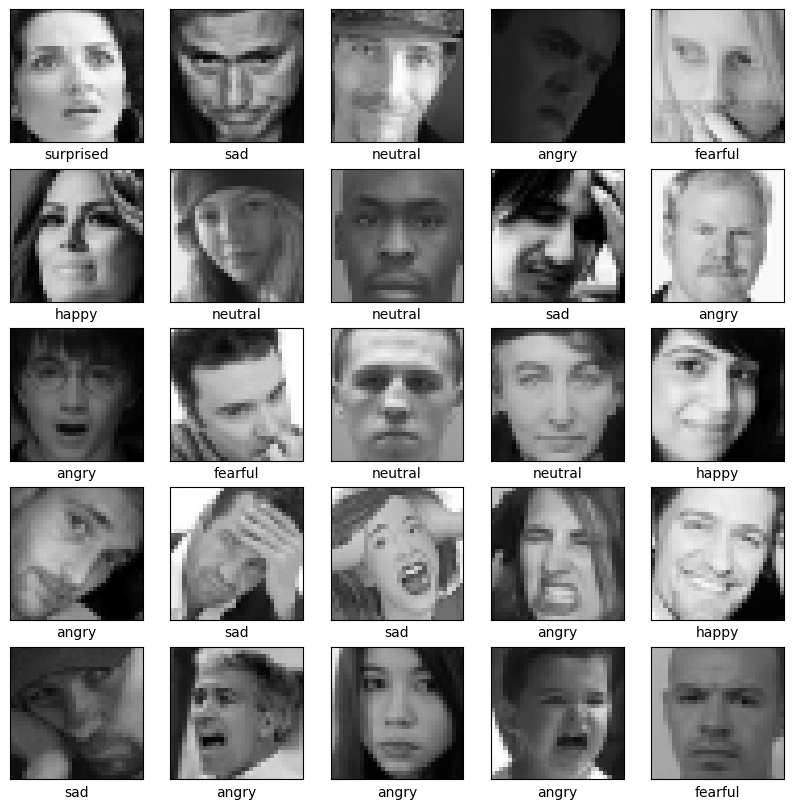

In [79]:

class_names = train_ds.class_names

plt.figure(figsize=(10,10))
for i in range(min(25, len(train_images))): 
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    plt.imshow(train_images[i].astype('uint8'))
    # Access the label from the (N, 1) shaped array
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


# Task
Construire, compiler, entraîner et évaluer un modèle de réseau neuronal convolutif (CNN) pour la classification d'images en utilisant les ensembles de données `train_ds` et `test_ds` déjà chargés. Le processus inclura la définition de l'architecture du CNN avec des couches Conv2D, MaxPooling2D, Flatten et Dense, la compilation du modèle avec l'optimiseur Adam et la perte SparseCategoricalCrossentropy, l'entraînement du modèle sur un nombre défini d'époques, l'évaluation de ses performances sur l'ensemble de données de test, et la visualisation de l'historique d'entraînement (précision et perte). Enfin, un résumé du processus et des résultats sera fourni.

## Construire et compiler le modèle

### Subtask:
Créer le modèle Convolutional Neural Network (CNN) en utilisant des couches Conv2D, MaxPooling2D, Flatten et Dense, puis le compiler avec l'optimiseur Adam et la perte SparseCategoricalCrossentropy. Les commentaires seront en français.


**Reasoning**:
The subtask requires normalizing the image data, defining the CNN model architecture with specific layers, and then compiling the model. This will be done in a single code block.



In [80]:
print("Normalisation des images et création/compilation du modèle CNN...")

# 1. Normaliser les valeurs des pixels des images
def normalize_img(image, label):
    # Convertir l'image en float et la normaliser
    return tf.cast(image, tf.float32) / 255.0, label

# Appliquer la fonction de normalisation aux ensembles de données
train_ds_normalized = train_ds.map(normalize_img)
test_ds_normalized = test_ds.map(normalize_img)

# Mettre en cache et précharger les ensembles de données pour de meilleures performances
train_ds_normalized = train_ds_normalized.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds_normalized = test_ds_normalized.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Déterminer le nombre de classes pour la couche de sortie
num_classes = len(class_names)

# 2. Définir l'architecture du modèle CNN
model = models.Sequential([
    # Première couche Conv2D et MaxPooling2D
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    # Deuxième couche Conv2D et MaxPooling2D
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Troisième couche Conv2D
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Aplatir la sortie pour les couches Dense
    layers.Flatten(),
    # Couches Dense
    layers.Dense(64, activation='relu'),
    # Couche de sortie avec le nombre de classes
    layers.Dense(num_classes)
])

# 3. Compiler le modèle
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

print("Modèle CNN créé et compilé avec succès.")
model.summary()

Normalisation des images et création/compilation du modèle CNN...
Modèle CNN créé et compilé avec succès.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,375 (478.03 KB)

 Trainable params: 122,375 (478.03 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous code produced a UserWarning about passing `input_shape` to the first `Conv2D` layer in a `Sequential` model. To address this, I will explicitly define an `Input` layer at the beginning of the model architecture.



In [81]:
print("Normalisation des images et création/compilation du modèle CNN...")

# 1. Normaliser les valeurs des pixels des images
def normalize_img(image, label):
    # Convertir l'image en float et la normaliser
    return tf.cast(image, tf.float32) / 255.0, label

# Appliquer la fonction de normalisation aux ensembles de données
train_ds_normalized = train_ds.map(normalize_img)
test_ds_normalized = test_ds.map(normalize_img)

# Mettre en cache et précharger les ensembles de données pour de meilleures performances
train_ds_normalized = train_ds_normalized.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds_normalized = test_ds_normalized.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Déterminer le nombre de classes pour la couche de sortie
num_classes = len(class_names)

# 2. Définir l'architecture du modèle CNN
model = models.Sequential([
    # Couche Input explicite pour définir la forme d'entrée et éviter l'avertissement
    tf.keras.Input(shape=(img_height, img_width, 3)),
    # Première couche Conv2D et MaxPooling2D
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Deuxième couche Conv2D et MaxPooling2D
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    # Troisième couche Conv2D
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Aplatir la sortie pour les couches Dense
    layers.Flatten(),
    # Couches Dense
    layers.Dense(64, activation='relu'),
    # Couche de sortie avec le nombre de classes
    layers.Dense(num_classes)
])

# 3. Compiler le modèle
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

print("Modèle CNN créé et compilé avec succès.")
model.summary()


Normalisation des images et création/compilation du modèle CNN...
Modèle CNN créé et compilé avec succès.


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,375 (478.03 KB)

 Trainable params: 122,375 (478.03 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous steps successfully built and compiled the CNN model. The next logical step, according to the overall task, is to train the model using the normalized training dataset and then evaluate its performance on the normalized test dataset.



In [ ]:
print("Entraînement et évaluation du modèle CNN...")

# Définir le nombre d'époques pour l'entraînement
epochs_to_train = 30

# Définir les callbacks
# EarlyStopping pour arrêter l'entraînement si la validation accuracy ne s'améliore plus
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=30,
    restore_best_weights=True
)

# ModelCheckpoint pour sauvegarder le meilleur modèle pendant l'entraînement
model_checkpoint = ModelCheckpoint(
    filepath='best_cnn_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Entraîner le modèle avec les callbacks
history = model.fit(
    train_ds_normalized,
    epochs=epochs_to_train,
    validation_data=test_ds_normalized,
    callbacks=[early_stopping, model_checkpoint]
)

print("Modèle entraîné avec succès.\n")

# Évaluer le modèle sur l'ensemble de données de test
print("Évaluation du modèle sur l'ensemble de données de test...")
loss, accuracy = model.evaluate(test_ds_normalized)

print(f"\nPrécision du modèle sur l'ensemble de test: {accuracy:.4f}")
print(f"Perte du modèle sur l'ensemble de test: {loss:.4f}")

print("Entraînement et évaluation terminés.")

## Utilisation de ResNet comme extracteur de caractéristiques pour KNN

Nous allons remplacer l'extracteur de caractéristiques basé sur le CNN simple par un modèle pré-entraîné **ResNet50V2** (sans la couche de classification supérieure) pour une extraction de caractéristiques plus robuste. Ensuite, nous réappliquerons le classifieur KNN sur ces nouvelles caractéristiques.

In [ ]:
print("Création du modèle ResNet50V2 avec Fine-Tuning COMPLET...")

# Préprocessing spécifique pour ResNet (différent de la normalisation /255)
def preprocess_for_resnet(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.keras.applications.resnet_v2.preprocess_input(image)
    return image, label

# Créer les datasets avec le préprocessing ResNet
train_ds_resnet = train_ds.map(preprocess_for_resnet).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds_resnet = test_ds.map(preprocess_for_resnet).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Nombre de classes
num_classes = len(class_names)

# Charger le modèle ResNet50V2 pré-entraîné sur ImageNet, sans les couches de classification
resnet_base = tf.keras.applications.ResNet50V2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)

# TOUT le modèle est entraînable - aucune couche gelée
resnet_base.trainable = True

print(f"Nombre total de couches dans ResNet: {len(resnet_base.layers)}")
print(f"Couches entraînables: {sum([1 for l in resnet_base.layers if l.trainable])}")

# Créer le modèle complet avec des couches de classification (SANS Lambda)
model_resnet = tf.keras.Sequential([
    # Base ResNet50V2 - ENTIÈREMENT ENTRAÎNABLE
    resnet_base,
    # Couches de classification
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes)  # from_logits=True dans la loss
])

# Compiler le modèle
model_resnet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

print("Modèle ResNet50V2 créé et compilé avec succès.")
model_resnet.summary()

# Afficher le nombre de paramètres
trainable_params = np.sum([np.prod(v.shape) for v in model_resnet.trainable_weights])
non_trainable_params = np.sum([np.prod(v.shape) for v in model_resnet.non_trainable_weights])
print(f"\nParamètres entraînables: {trainable_params:,}")
print(f"Paramètres non-entraînables (BatchNorm stats): {non_trainable_params:,}")

## Entraîner et évaluer le modèle KNN avec les caractéristiques ResNet

In [ ]:
print("Entraînement du modèle ResNet50V2 avec Fine-Tuning...")

# Définir le nombre d'époques pour l'entraînement
epochs_resnet = 20

# Définir les callbacks
early_stopping_resnet = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

model_checkpoint_resnet = ModelCheckpoint(
    filepath='best_resnet_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Entraîner le modèle ResNet avec les datasets préprocessés pour ResNet
history_resnet = model_resnet.fit(
    train_ds_resnet,
    epochs=epochs_resnet,
    validation_data=test_ds_resnet,
    callbacks=[early_stopping_resnet, model_checkpoint_resnet]
)

print("Modèle ResNet entraîné avec succès.\n")

# Évaluer le modèle sur l'ensemble de test
print("Évaluation du modèle ResNet sur l'ensemble de données de test...")
loss_resnet, accuracy_resnet = model_resnet.evaluate(test_ds_resnet)

print(f"\nPrécision du modèle ResNet sur l'ensemble de test: {accuracy_resnet:.4f}")
print(f"Perte du modèle ResNet sur l'ensemble de test: {loss_resnet:.4f}")

# Sauvegarder les poids séparément (plus compatible entre versions TF)
model_resnet.save_weights('resnet_weights.weights.h5')
print("Poids sauvegardés dans 'resnet_weights.weights.h5'")

print("Entraînement et évaluation ResNet terminés.")

## Afficher l'historique d'entraînement


Visualiser l'historique de l'exactitude et de la perte d'entraînement et de validation au fil des époques pour analyser les performances du modèle. Les commentaires seront en français.


Affichage de l'historique d'entraînement...


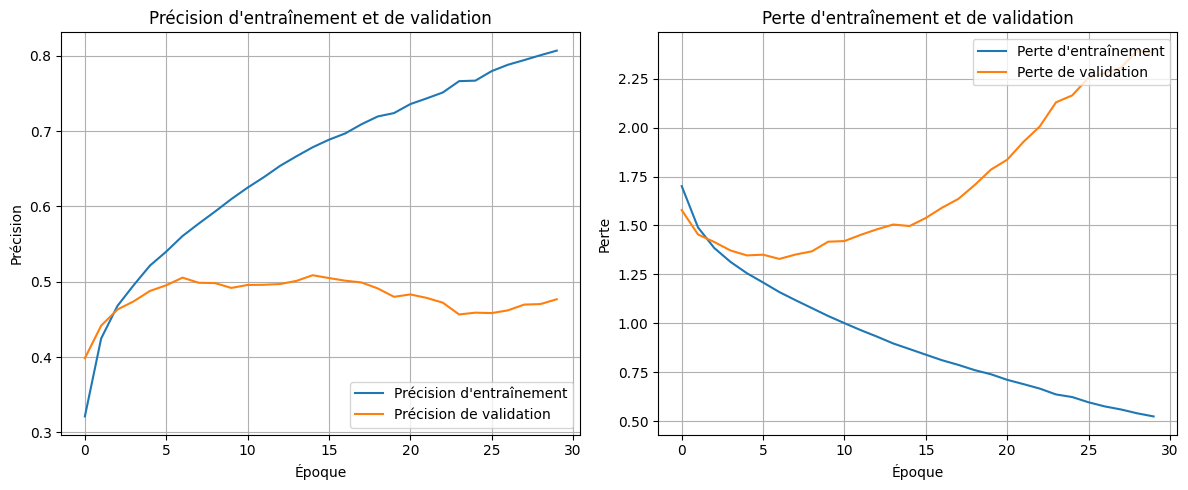

In [85]:
print("Affichage de l'historique d'entraînement...")

# Récupérer l'historique d'entraînement
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc)) # Nombre d'époques est la longueur de l'historique

plt.figure(figsize=(12, 5))

# Graphique pour la précision (Accuracy)
plt.subplot(1, 2, 1) # 1 ligne, 2 colonnes, premier graphique
plt.plot(epochs_range, acc, label='Précision d\'entraînement')
plt.plot(epochs_range, val_acc, label='Précision de validation')
plt.title('Précision d\'entraînement et de validation')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend(loc='lower right')
plt.grid(True)

# Graphique pour la perte (Loss)
plt.subplot(1, 2, 2) # 1 ligne, 2 colonnes, deuxième graphique
plt.plot(epochs_range, loss, label='Perte d\'entraînement')
plt.plot(epochs_range, val_loss, label='Perte de validation')
plt.title('Perte d\'entraînement et de validation')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout() # Ajuste automatiquement les paramètres des sous-diagrammes pour que tout rentre
plt.show()